# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 01<br/><br/>Data Preprocessing, EDA and Regression Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>EV Charging Station</font>**

### <center>Introduction </center>

**Dataset Name**: Electric Vehicle(EV) Charging station<br/><br/>
$\hspace{1.5cm}$The Electric Vechilce(EV) Charging station dataset provides the information about the usage patterns of EV Charging stations in the city of Palo Alto, California. This includes data of the time from July 2011 to Jan 2021. It is an open dataset that provides information about the availaabillity, utilization and demand for EV charging infrastructure. This helps in a deeper understanding for the Local EV Market and thus helps researchers, analysts and businesses for sustainable transportation practices. This dataset contains the information on how much Energy is consumed in charging, how much GHG(Green House Gases) are saved by avoiding other fuel based vehicles. This helps to decide whether it is a better eco-friendly alternative or not.The dataset also includes the type of charging port, plugs, energy consumptions which enables to analyze the charging infrastructure performance.
<br/><br/>
**Use**: To provide comprehensive insights into the usage patterns of Electric Vehicle(EV) charging stations in the city of Palo Alto, California<br/>

**Dataset Link**: https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city

**Documentation**: https://github.com/Gangaraj-eng/IT496_DataForce_CourseProject1/blob/Course_Project_1/readme.md

**Problem Statement 1 - GHG Saving Prediction**: To build a regression model that can predict the amount of GHG(Green House Gases) savings(in KG) of an electric vehicle charging session based on the charging session predictors like charging time, Total Duration, port Type, plug Type, Model Number, etc.

**Problem Statement 2 - Fee Prediction**: 
To predict the amount of fee charged for a session using the charging session factors like Energy, Charging Time, Station Name, Plug Type and Port Type and so on.

In this project, we are going to build regression model that will help to solve the above two problems.

### <center>Exploratory Data Analysis</center>

In [42]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading dataset

In [43]:
# replace the csv file path here
dataFilePath = "C:\\Users\\rajini bopparam\\Downloads\\EVChargingStationUsage.csv"
Data = pd.read_csv(dataFilePath, low_memory = False)
# setting low_memory to false to ignore "mixed data type" warning 

Data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,03:03:32,01:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,00:02:06,00:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,04:17:32,04:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,02:03:24,02:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,01:11:24,00:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [44]:
Data.shape

(259415, 33)

Let's check the details of all columns

In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [46]:
Data.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443911e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483968e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.020000e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.707410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


The describe function above gives some of statistics for columns of numerical data types

Let's check the number of unique entries in each column

In [47]:
Data.nunique()

Station Name                           47
MAC Address                            83
Org Name                                2
Start Date                         244798
Start Time Zone                         3
End Date                           244159
End Time Zone                           3
Transaction Date (Pacific Time)    240905
Total Duration (hh:mm:ss)           31025
Charging Time (hh:mm:ss)            22473
Energy (kWh)                       118061
GHG Savings (kg)                    15535
Gasoline Savings (gallons)           6333
Port Type                               2
Port Number                             2
Plug Type                               2
EVSE ID                                51
Address 1                              20
City                                    1
State/Province                          1
Postal Code                             3
Country                                 1
Latitude                               62
Longitude                         

As we can see, there are certain columns like City, State and Country which have only a single value for all entries. Hence, these columns are not much useful for any interesting analysis!!

Box Plots

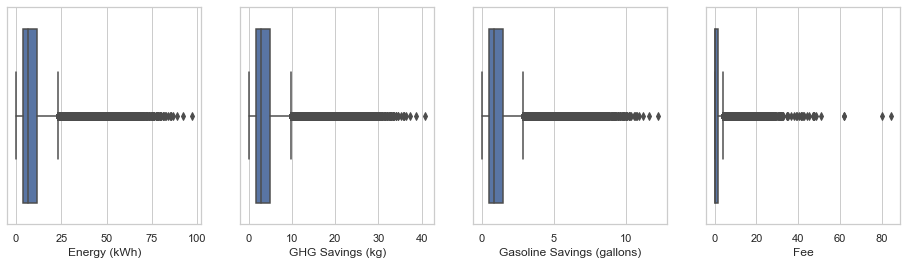

In [48]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Energy (kWh)", "GHG Savings (kg)", "Gasoline Savings (gallons)","Fee"]):
    sns.boxplot(x=Data[col], ax=ax[axid])

From the boxplot, we can say that Energy, GHG Savings, Gasoline savings and Fee are **right skewed**.

Is there a correlation between Energy and GHG(Green House Gases) savings?

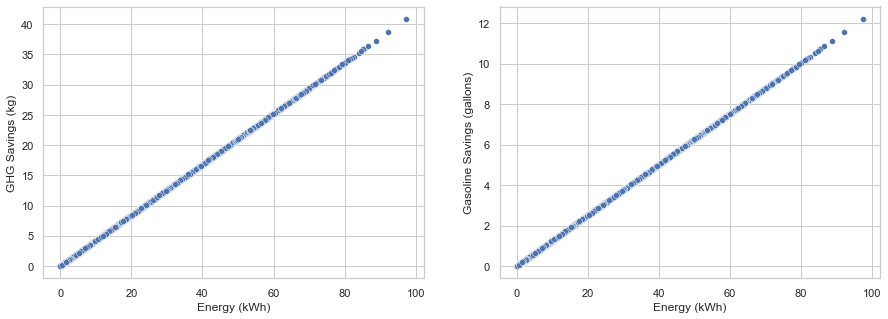

In [49]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x=Data['Energy (kWh)'], y = Data['GHG Savings (kg)'],ax=ax1)
sns.scatterplot(x=Data['Energy (kWh)'], y = Data['Gasoline Savings (gallons)'],ax=ax2)
plt.show()

Is there a correlation between Energy and Gasoline savings?

GHG savings, Gasoline savings are almost perfectly correlated with Energy. Thus these columns can be ignored as they contain repetitive information.

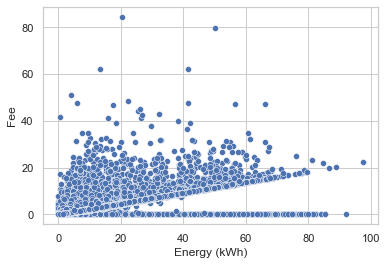

In [50]:
sns.scatterplot(x=Data['Energy (kWh)'], y = Data['Fee'])
plt.show()

There is no much correlation between Energy and Fee, but we can observe a possibilty of few outliers!!

The same can be visualized through a heat map

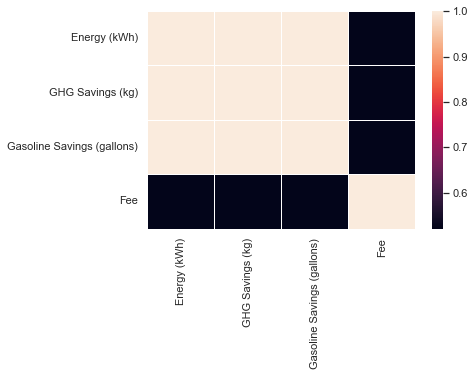

In [51]:
numericData = Data[['Energy (kWh)','GHG Savings (kg)','Gasoline Savings (gallons)','Fee']]
sns.heatmap(data = numericData.corr(), lw=1)
plt.show()

The above heatmap shows a perfect correlation between Energy, GHG Savings and Gasoline but not with Fee.

Checking for NULL values in the dataset

In [52]:
Data.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

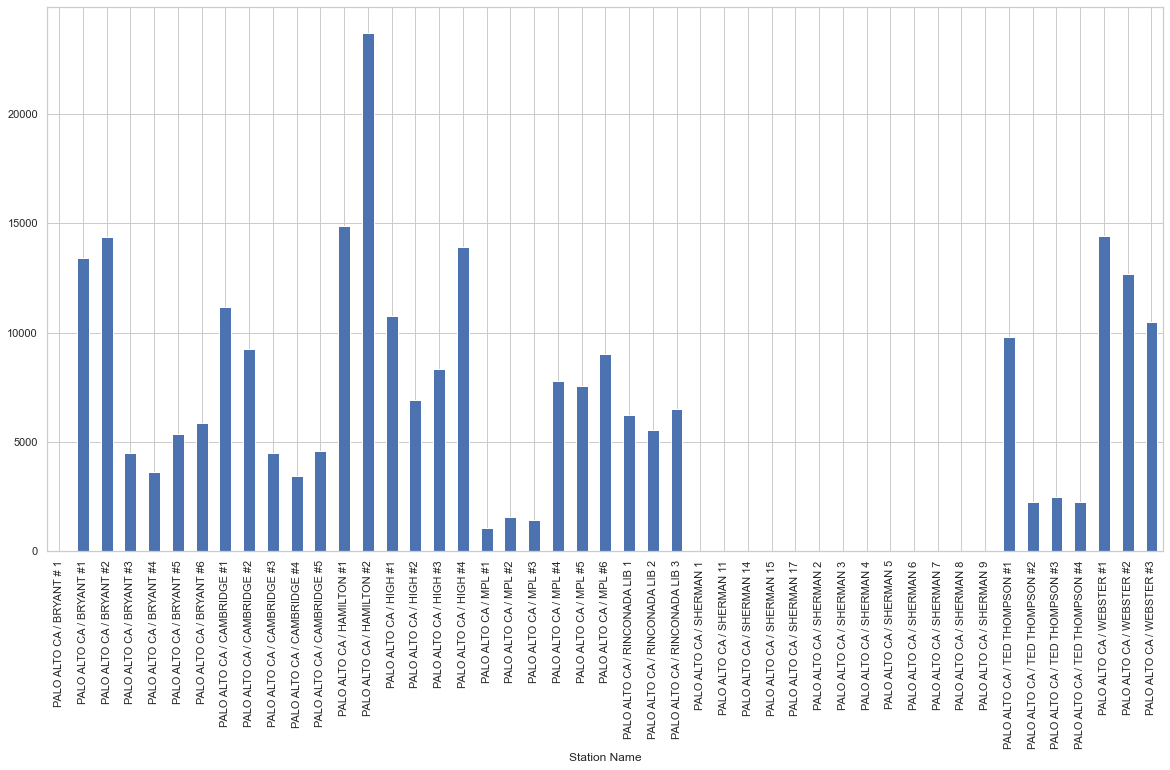

In [53]:
Data.groupby('Station Name').size().plot(kind='bar',figsize=(20,10))
plt.show()

From the above bar graph, we can see that the maximum number of charging sessions are recorded in the station 'PALO ALTO CA / HAMILTON #2'

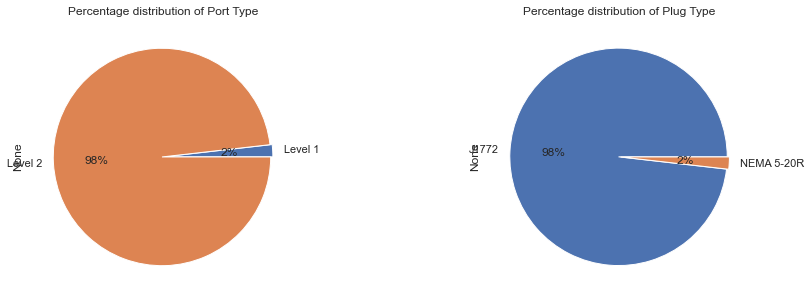

In [54]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
Data.groupby('Port Type').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01, 0.01],title='Percentage distribution of Port Type',labels=['Level 1','Level 2'],ax=ax1)
Data.groupby('Plug Type').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01, 0.01],title='Percentage distribution of Plug Type',labels=['J1772','NEMA 5-20R'],ax=ax2)
plt.show()

In [55]:
Data.groupby('Currency').size()

Currency
CAD         1
EUR         8
MXN         5
USD    257613
dtype: int64

As there are very large differences of USD, to visualize all of these, a logarithmic scale should be used!!

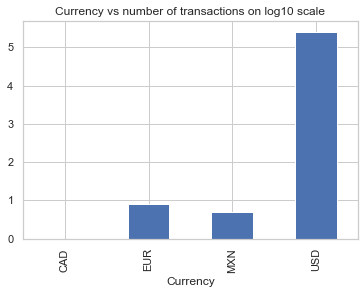

In [56]:
Data.groupby('Currency').size().apply(lambda x: np.log10(x)).plot(kind='bar')
plt.title('Currency vs number of transactions on log10 scale')
plt.show()

We can see that most of the transactions used $USD$ currency.

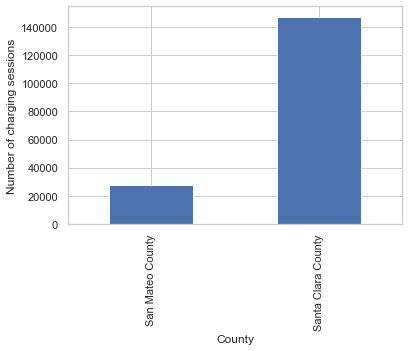

In [57]:
Data.groupby('County').size().plot(kind='bar')
plt.ylabel('Number of charging sessions')
plt.show()

Out of the two counties, majority of the charging sessions were recorded in Santa Clara County!!.

Distributions with respected to Latitude and Longitude of charging stations

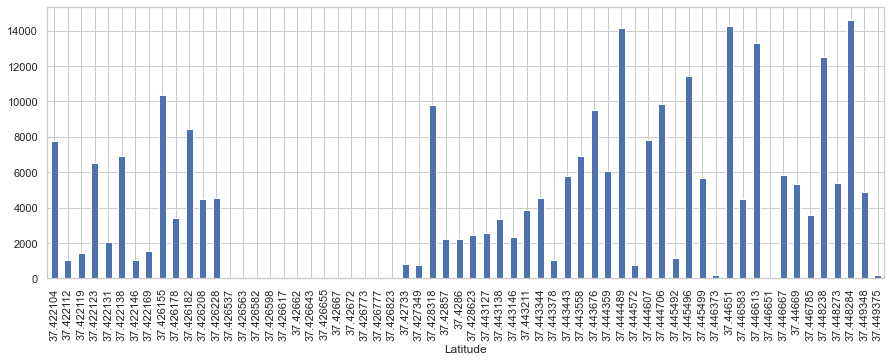

In [58]:
Data.groupby('Latitude').size().plot(kind='bar',figsize=(15,5))
plt.show()

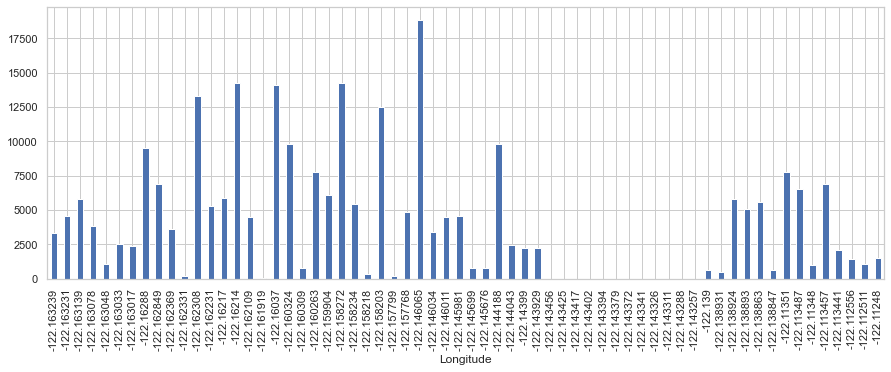

In [59]:
Data.groupby('Longitude').size().plot(kind='bar',figsize=(15,5))
plt.show()

Is Org Name is useful in Analysis?

In [60]:
Data['Org Name'].unique()

array(['City of Palo Alto', 'City of Palo Alto '], dtype=object)

We can see that Org Name has only one value(City of Palo Alto) for all examples and thus is not useful in analysis!!

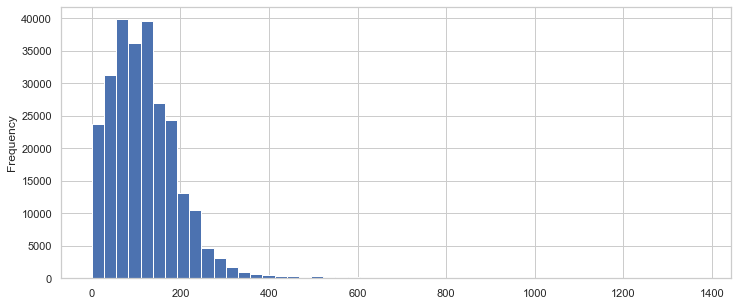

In [61]:
# function to return total number of minutes taken for charging
def getMinutesFromTime(time):
    h,m,s = map(int,time.split(':'))
    return h*60+m

Data['Charging Time (hh:mm:ss)'].apply(getMinutesFromTime).plot(kind='hist',bins=50,figsize=(12,5))
plt.show()

From the above histogram, most of the EV session take around $50$ minutes to $150$ minutes for charging

# 1. GHG Savings Prediction

### <center>Data Preprocessing</center>

The columns that will be removed with reasons: 
1. Energy, Gasoline Savings - These are perfectly correlated with GHG Savings and thus no point in using these columns to predict GHG savings.
2. City, State/Province, Country, Org Name - These columns have only a single value for all data points and thus not useful in analysis
3. MAC Address(of Electric charging equipment), Start Date, Start Time Zone, End Date, End Time Zone, Transaction Date, EVSE ID, Postal Code, Latitude, Longitude, Currency,Plug In Event Id, Driver Postal Code, System S/N - as the amount of GHG savings doesn't depend on these columns.

In [62]:
# redundant columns 
Data.drop(['Energy (kWh)','Gasoline Savings (gallons)'],axis=1, inplace=True)

# columns all having all same value
Data.drop(['Org Name','City','State/Province','Country'],axis=1,inplace=True)

# columns that doesn't impact GHG savings
Data.drop(['MAC Address','Start Date','Start Time Zone','End Date','End Time Zone','Transaction Date (Pacific Time)',
              'Latitude','Longitude','Currency','Fee','Plug In Event Id','Postal Code','Driver Postal Code','User ID','EVSE ID','Address 1',
              'System S/N',],axis=1,inplace=True)

In [63]:
Data.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),GHG Savings (kg),Port Type,Port Number,Plug Type,Ended By,County,Model Number
0,PALO ALTO CA / HAMILTON #1,03:03:32,01:54:03,2.625,Level 2,2,J1772,Plug Out at Vehicle,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,00:02:06,00:01:54,0.045,Level 2,2,J1772,Customer,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,04:17:32,04:17:28,6.280,Level 2,2,J1772,Plug Out at Vehicle,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,02:03:24,02:02:58,3.007,Level 2,2,J1772,Customer,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,01:11:24,00:43:54,0.822,Level 2,2,J1772,Plug Out at Vehicle,NaN,NaN


In [64]:
Data.isnull().sum()

Station Name                     0
Total Duration (hh:mm:ss)        0
Charging Time (hh:mm:ss)         0
GHG Savings (kg)                 0
Port Type                        9
Port Number                      0
Plug Type                        0
Ended By                       248
County                       84665
Model Number                 78948
dtype: int64

#### Replacing null values

In [65]:
mode_value = Data['Ended By'].mode()
Data['Ended By'].fillna(str(mode_value), inplace = True)

mode_value = Data['Port Type'].mode()
Data['Port Type'].fillna(str(mode_value), inplace=True)

mode_value = Data['Model Number'].mode()
Data['Model Number'].fillna(str(mode_value), inplace = True)

mode_value = Data['County'].mode()
Data['County'].fillna(str(mode_value), inplace = True)

AS theses are nominal attributes, and mode is the best measure of central tendency for nominal attributes, mode is used to replace the null values for the above columns

#### Feature Transformation

Converting Total Duration and Charging Time from string to seconds so that it will be of numeric type and can be used for analysis

In [29]:
# function that converts time from string into seconds
def StringToSeconds(time):
    hours, minutes, seconds = map(int,time.split(':'))
    totalSeconds = hours*3600+minutes*60+seconds
    return totalSeconds

In [30]:
Data['Charging Time (hh:mm:ss)'] = Data['Charging Time (hh:mm:ss)'].apply(lambda t: StringToSeconds(t))
Data['Total Duration (hh:mm:ss)'] = Data['Total Duration (hh:mm:ss)'].apply(lambda t: StringToSeconds(t))

Data[['Charging Time (hh:mm:ss)','Total Duration (hh:mm:ss)']]

,Charging Time (hh:mm:ss),Total Duration (hh:mm:ss)
0,6843,11012
1,114,126
2,15448,15452
3,7378,7404
4,2634,4284
...,...,...
259410,2118,2144
259411,8044,13381
259412,18492,62894
259413,14022,14734


In [33]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Station Name               259415 non-null  object 
 1   Total Duration (hh:mm:ss)  259415 non-null  int64  
 2   Charging Time (hh:mm:ss)   259415 non-null  int64  
 3   GHG Savings (kg)           259415 non-null  float64
 4   Port Type                  259415 non-null  object 
 5   Port Number                259415 non-null  int64  
 6   Plug Type                  259415 non-null  object 
 7   Ended By                   259415 non-null  object 
 8   County                     259415 non-null  object 
 9   Model Number               259415 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 19.8+ MB


The attributes Station Name, Port Type, Plug Type, Ended By, County and Model Number have non-numerical value. They need to be encoded into some numerical attributes

#### Encoding for nominal attributes

In [34]:
labelEncoder = preprocessing.LabelEncoder()
Data[['Station Name','Port Type','Plug Type','Ended By','County','Model Number']] = Data[['Station Name','Port Type','Plug Type','Ended By','County','Model Number']].apply(labelEncoder.fit_transform)
Data.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),GHG Savings (kg),Port Type,Port Number,Plug Type,Ended By,County,Model Number
0,12,11012,6843,2.625,2,2,0,12,0,0
1,12,126,114,0.045,2,2,0,2,0,0
2,12,15452,15448,6.280,2,2,0,12,0,0
3,12,7404,7378,3.007,2,2,0,2,0,0
4,12,4284,2634,0.822,2,2,0,12,0,0


In [35]:
Data.shape

(259415, 10)

### <center>Regression Analysis</center>

Train and Test splits

In [36]:
x_train, x_test, y_train, y_test = train_test_split(Data, Data['GHG Savings (kg)'], random_state = 40, test_size = 0.20)

print(f"Training size = {len(y_train)}")
print(f"Test size = {len(y_test)}")

Training size = 207532
Test size = 51883


We can use sklearn RobustScaler for normalization and to remove outliers using standard IQR method

In [37]:
# normalizing train and test sets seperately so that no information from 
# test set will be leaked
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(f"Shape of training data after normalizing = {x_train.shape}")
print(f"Shape of test data after normalizing = {x_test.shape}")

Shape of training data after normalizing = (207532, 10)
Shape of test data after normalizing = (51883, 10)


The number of rows remained unchanged suggesting absence of major outliers<br/>
Here, Train and Test sets are normalized seperately so that there will be no leakage of information from test set while training

### Regression models 

The following models are used to perform regression:
1. Lasso Regression
2. Ridge Regression
3. ElasticNet
4. Stochastic Gradient Descent Regression

In [38]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.model_selection import GridSearchCV
models = {
    
    'LassoRegression':{
        'model':Lasso(random_state = 40),
        'parameters':{
            'alpha':[0.001,0.01,0.05,0.1,0.2,0.5],# regularization constant
            'selection':['cyclic','random'],
            'max_iter':[500,1000,1500,2000]
        }
    },
    
    'RidgeRegression':{
        'model':Ridge(random_state = 40),
        'parameters':{
            'alpha':[0.001,0.01,0.05,0.1],# regularization constant,
            'solver':['auto','svd','cholesky'],
            'max_iter':[500,1000,1500,2000]
        }
    },
    
    'ElasticNet':{
        'model':ElasticNet(random_state = 40),
        'parameters':{
            'alpha':[0.001,0.01,0.1,0.5],
            'l1_ratio':[0.2,0.5,0.8],
            'max_iter':[1000,2000],
            'selection':['cyclic','random']
        }
    },
    
    'SGDRegression':{
        'model':SGDRegressor(random_state = 40),
        'parameters':{
            'loss':['squared_error','huber','epsilon_insensitive'],
            'penalty':['l2','l1'],
            'alpha':[0.001,0.01,0.1,0.5],
            # the learning rate schedule
            'learning_rate':['constant','invscaling']
        },
    }
}

Model Training

In [39]:
results = pd.DataFrame()

results['Mean square Error(MSE)'] = None
results['Mean absolute Error(MAE)'] = None
results['Root Mean Squared Error(RMSE)'] = None
results['Best Params']=None
results['Time taken']=None
results['Best Regressor']=None

best_model =None
best_mse = np.inf

for modelName, classifier in models.items():
    start = time.time()
    regressor = GridSearchCV(classifier['model'], classifier['parameters'],n_jobs = 10, verbose = 1)
    regressor.fit(x_train,list(y_train))
    best_regressor = regressor.best_estimator_
    end = time.time()
    time_taken = end-start
    y_train_pred = best_regressor.predict(x_train)
    mse = mean_squared_error(y_train, y_train_pred)
    mae = mean_absolute_error(y_train, y_train_pred)
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    
    if mse < best_mse:
        best_mse = mse
        best_model = modelName
    
    print(f"Completed training for {modelName} \t Time taken : {time_taken} seconds\n")
    
    results.loc[modelName,['Mean square Error(MSE)','Mean absolute Error(MAE)','Root Mean Squared Error(RMSE)','Best Params','time_taken','Best Regressor']] = [mse, mae, rmse, regressor.best_params_,time_taken,best_regressor]

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for LassoRegression 	 Time taken : 184.88793110847473 seconds

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for RidgeRegression 	 Time taken : 181.58831691741943 seconds

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for ElasticNet 	 Time taken : 190.13943099975586 seconds

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for SGDRegression 	 Time taken : 115.5964949131012 seconds



In [40]:
pd.set_option('display.max_colwidth', None)

In [41]:
print(f"Best model = {best_model} with MSE = {best_mse}")
results[['Mean square Error(MSE)','Mean absolute Error(MAE)','Root Mean Squared Error(RMSE)','Best Params','time_taken']]

Best model = RidgeRegression with MSE = 1.2923401540138446e-15


,Mean square Error(MSE),Mean absolute Error(MAE),Root Mean Squared Error(RMSE),Best Params,time_taken
LassoRegression,0.000001,0.000738,0.001065,"{'alpha': 0.001, 'max_iter': 500, 'selection': 'cyclic'}",184.887931
RidgeRegression,0.0,0.0,0.0,"{'alpha': 0.001, 'max_iter': 500, 'solver': 'auto'}",181.588317
ElasticNet,0.000004,0.001356,0.001901,"{'alpha': 0.001, 'l1_ratio': 0.8, 'max_iter': 1000, 'selection': 'cyclic'}",190.139431
SGDRegression,0.000001,0.00074,0.001064,"{'alpha': 0.001, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'penalty': 'l1'}",115.596495


### <center>Evaluation</center>

In [39]:
test_results = pd.DataFrame()

for modelName in results.index:
    model = results.loc[modelName]['Best Regressor']
    y_test_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    test_results.loc[modelName,['MSE','MAE','RMSE']]=[mse,mae,rmse]

print("Performance on the test set is as follows:")
test_results.head()

Performance on the test set is as follows:


,MSE,MAE,RMSE
LassoRegression,1.107391e-06,7.351427e-04,1.052326e-03
RidgeRegression,1.253263e-15,2.719636e-08,3.540145e-08
ElasticNet,3.487259e-06,1.347967e-03,1.867420e-03
SGDRegression,1.105886e-06,7.370521e-04,1.051611e-03


From the above results, we can see that Ridge Regressor has the best performance over both train and test data.

### Comparision of all the models

Ridge Regression model is giving best performance as it has the least error among all the four models used above. The possible reasons for this better performance of ridge regression are:
1. The given dataset has high degree of feature correlation as can be seen in EDA. Ridge regression can mitigate the problem of multicollinearity and thus it outperforms other models.
2. The given dataset can be easily overfitten by complex models and as the ridge regression add more penalty to weights, it is able to better prevent overfitting than Lasso and Elastic Net.
3. Stochastic gradient descent regression has convergence issues and thus can lead to suboptimal solutions and hence it underperforms compared to Ridge Regression.

---

# 2. Fee Prediction

In [78]:
# replace the csv file path here
dataFilePath = "C:\\Users\\rajini bopparam\\Downloads\\EVChargingStationUsage.csv"
Data = pd.read_csv(dataFilePath, low_memory = False)
# setting low_memory to false to ignore "mixed data type" warning

### <center>Data Preprocessing</center>

Columns that can be removed: 
1. GHG Saving and Gasoline Saving as all these information is already present in Energy Column.
2. Org Name , city state/province, country - same for all instances
3. other columns that are not related!!

In [79]:
# redundant columns 
Data.drop(['GHG Savings (kg)','Gasoline Savings (gallons)'],axis=1, inplace=True)

# columns all having all same value
Data.drop(['Org Name','City','State/Province','Country'],axis=1,inplace=True)

# columns that doesn't impact GHG savings
Data.drop(['MAC Address','Start Date','Start Time Zone','End Date','End Time Zone','Transaction Date (Pacific Time)',
              'Plug In Event Id','Postal Code','Driver Postal Code','User ID','EVSE ID','Address 1',
              'System S/N',],axis=1,inplace=True)

In [80]:
Data.isnull().sum()

Station Name                     0
Total Duration (hh:mm:ss)        0
Charging Time (hh:mm:ss)         0
Energy (kWh)                     0
Port Type                        9
Port Number                      0
Plug Type                        0
Latitude                         0
Longitude                        0
Currency                      1788
Fee                              0
Ended By                       248
County                       84665
Model Number                 78948
dtype: int64

#### Replacing null values

In [81]:
mode_value = Data['Ended By'].mode()
Data['Ended By'].fillna(str(mode_value), inplace = True)

mode_value = Data['Currency'].mode()
Data['Currency'].fillna(str(mode_value),inplace = True)

mode_value = Data['Port Type'].mode()
Data['Port Type'].fillna(str(mode_value), inplace=True)

mode_value = Data['Model Number'].mode()
Data['Model Number'].fillna(str(mode_value), inplace = True)

mode_value = Data['County'].mode()
Data['County'].fillna(str(mode_value), inplace = True)

#### Feature Transformation

Converting Total Duration and Charging Time from string to seconds

In [82]:
Data['Charging Time (hh:mm:ss)'] = Data['Charging Time (hh:mm:ss)'].apply(lambda t: StringToSeconds(t))
Data['Total Duration (hh:mm:ss)'] = Data['Total Duration (hh:mm:ss)'].apply(lambda t: StringToSeconds(t))

Data[['Charging Time (hh:mm:ss)','Total Duration (hh:mm:ss)']]

,Charging Time (hh:mm:ss),Total Duration (hh:mm:ss)
0,6843,11012
1,114,126
2,15448,15452
3,7378,7404
4,2634,4284
...,...,...
259410,2118,2144
259411,8044,13381
259412,18492,62894
259413,14022,14734


In [83]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Station Name               259415 non-null  object 
 1   Total Duration (hh:mm:ss)  259415 non-null  int64  
 2   Charging Time (hh:mm:ss)   259415 non-null  int64  
 3   Energy (kWh)               259415 non-null  float64
 4   Port Type                  259415 non-null  object 
 5   Port Number                259415 non-null  int64  
 6   Plug Type                  259415 non-null  object 
 7   Latitude                   259415 non-null  float64
 8   Longitude                  259415 non-null  float64
 9   Currency                   259415 non-null  object 
 10  Fee                        259415 non-null  float64
 11  Ended By                   259415 non-null  object 
 12  County                     259415 non-null  object 
 13  Model Number               25

#### Encoding for nominal attributes

In [85]:
labelEncoder = preprocessing.LabelEncoder()
Data[['Station Name','Currency','Port Type','Plug Type','Ended By','County','Model Number']] = Data[['Station Name','Currency','Port Type','Plug Type','Ended By','County','Model Number']].apply(labelEncoder.fit_transform)
Data.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),Port Type,Port Number,Plug Type,Latitude,Longitude,Currency,Fee,Ended By,County,Model Number
0,12,11012,6843,6.249457,2,2,0,37.444572,-122.160309,4,0.0,12,0,0
1,12,126,114,0.106588,2,2,0,37.444572,-122.160309,4,0.0,2,0,0
2,12,15452,15448,14.951777,2,2,0,37.444572,-122.160309,4,0.0,12,0,0
3,12,7404,7378,7.159643,2,2,0,37.444572,-122.160309,4,0.0,2,0,0
4,12,4284,2634,1.957765,2,2,0,37.444572,-122.160309,4,0.0,12,0,0


### <center>Regression Analysis</center>

Train and Test splits

In [86]:
x_train, x_test, y_train, y_test = train_test_split(Data, Data['Fee'], random_state = 40, test_size = 0.20)

print(f"Training size = {len(y_train)}")
print(f"Test size = {len(y_test)}")

Training size = 207532
Test size = 51883


We can use sklearn RobustScaler for normalization and to remove outliers using standard IQR method

In [87]:
# normalizing train and test sets seperately so that no information from 
# test set will be leaked
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(f"Shape of training data after normalizing = {x_train.shape}")
print(f"Shape of test data after normalizing = {x_test.shape}")

Shape of training data after normalizing = (207532, 14)
Shape of test data after normalizing = (51883, 14)


The number of rows remained unchanged suggesting absence of major outliers

### Regression models 

The following models are used to perform regression:
1. Lasso Regression
2. Ridge Regression
3. ElasticNet
4. Stochastic Gradient Descent Regression

In [88]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.model_selection import GridSearchCV
models = {
    
    'LassoRegression':{
        'model':Lasso(random_state = 40),
        'parameters':{
            'alpha':[0.001,0.01,0.05,0.1,0.2,0.5],# regularization constant
            'selection':['cyclic','random'],
            'max_iter':[500,1000,1500,2000]
        }
    },
    
    'RidgeRegression':{
        'model':Ridge(random_state = 40),
        'parameters':{
            'alpha':[0.001,0.01,0.05,0.1],# regularization constant,
            'solver':['auto','svd','cholesky'],
            'max_iter':[500,1000,1500,2000]
        }
    },
    
    'ElasticNet':{
        'model':ElasticNet(random_state = 40),
        'parameters':{
            'alpha':[0.001,0.01,0.1,0.5],
            'l1_ratio':[0.2,0.5,0.8],
            'max_iter':[1000,2000],
            'selection':['cyclic','random']
        }
    },
    
    'SGDRegression':{
        'model':SGDRegressor(random_state = 40),
        'parameters':{
            'loss':['squared_error','huber','epsilon_insensitive'],
            'penalty':['l2','l1'],
            'alpha':[0.001,0.01,0.1,0.5],
            # the learning rate schedule
            'learning_rate':['constant','invscaling']
        },
    }
}

Model Training

In [89]:
results = pd.DataFrame()

results['Mean square Error(MSE)'] = None
results['Mean absolute Error(MAE)'] = None
results['Root Mean Squared Error(RMSE)'] = None
results['Best Params']=None
results['Time taken']=None
results['Best Regressor']=None

best_model =None
best_mse = np.inf

for modelName, classifier in models.items():
    start = time.time()
    regressor = GridSearchCV(classifier['model'], classifier['parameters'],n_jobs = 10, verbose = 1)
    regressor.fit(x_train,list(y_train))
    best_regressor = regressor.best_estimator_
    end = time.time()
    time_taken = end-start
    y_train_pred = best_regressor.predict(x_train)
    mse = mean_squared_error(y_train, y_train_pred)
    mae = mean_absolute_error(y_train, y_train_pred)
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    
    if mse < best_mse:
        best_mse = mse
        best_model = modelName
    
    print(f"Completed training for {modelName} \t Time taken : {time_taken} seconds\n")
    
    results.loc[modelName,['Mean square Error(MSE)','Mean absolute Error(MAE)','Root Mean Squared Error(RMSE)','Best Params','time_taken','Best Regressor']] = [mse, mae, rmse, regressor.best_params_,time_taken,best_regressor]

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for LassoRegression 	 Time taken : 80.61291527748108 seconds

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for RidgeRegression 	 Time taken : 74.14338684082031 seconds

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for ElasticNet 	 Time taken : 84.88286852836609 seconds

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Completed training for SGDRegression 	 Time taken : 91.41072916984558 seconds



In [94]:
print(f"Best model = {best_model} with MSE = {best_mse}")
results[['Mean square Error(MSE)','Mean absolute Error(MAE)','Root Mean Squared Error(RMSE)','Best Params','time_taken']]

Best model = RidgeRegression with MSE = 7.505920679597945e-17


,Mean square Error(MSE),Mean absolute Error(MAE),Root Mean Squared Error(RMSE),Best Params,time_taken
LassoRegression,0.000001,0.000555,0.000848,"{'alpha': 0.001, 'max_iter': 500, 'selection': 'cyclic'}",80.612915
RidgeRegression,0.0,0.0,0.0,"{'alpha': 0.001, 'max_iter': 500, 'solver': 'auto'}",74.143387
ElasticNet,0.000001,0.000626,0.000957,"{'alpha': 0.001, 'l1_ratio': 0.8, 'max_iter': 1000, 'selection': 'cyclic'}",84.882869
SGDRegression,0.000001,0.000553,0.000831,"{'alpha': 0.001, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'penalty': 'l1'}",91.410729


### <center>Evaluation</center>

In [95]:
test_results = pd.DataFrame()

for modelName in results.index:
    model = results.loc[modelName]['Best Regressor']
    y_test_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    test_results.loc[modelName,['MSE','MAE','RMSE']]=[mse,mae,rmse]

print("Performance on the test set is as follows:")
test_results.head()

Performance on the test set is as follows:


,MSE,MAE,RMSE
LassoRegression,7.218366e-07,5.545930e-04,8.496097e-04
RidgeRegression,7.532212e-17,5.125672e-09,8.678831e-09
ElasticNet,9.181891e-07,6.254910e-04,9.582219e-04
SGDRegression,6.923496e-07,5.523885e-04,8.320755e-04


From the above results, we can see that Ridge Regressor has the best performance over both train and test data.

Thus Ridge regression has best performance even here compared to other models and the reasons being the same as in problem 1. Hence, Ridge regression is better able to prevent overfitting and thus giving good results for the given dataset.

---

### <center>THE END</center>

---